### Path Finder: What are the potential paths between two nodes?
### This pipeline can be used to get a ranked path between A and B given a set of paths.

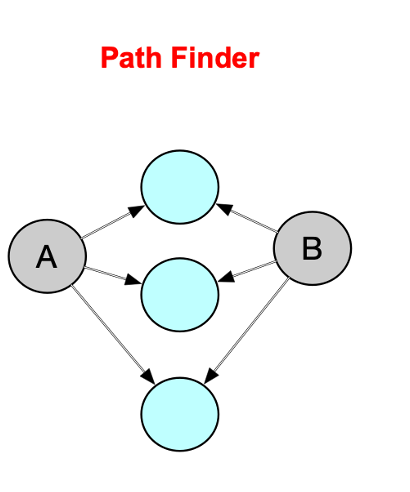

Example questions: 

What drugs may treat ovarian cancer (MONDO:0008170) patients with BRCA1 mutation?  

What is the mechanism of Olaparib being effective for patients with BRCA1 mutation?


In [1]:
from TCT import TCT

from TCT import node_normalizer
from TCT import name_resolver
from TCT import translator_metakg
from TCT import translator_kpinfo
from TCT import translator_query


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json
import pandas as pd
import  seaborn as sns
import networkx as nx
import numpy as np
import ipycytoscape
import yaml

In [2]:
def load_translator_resources():
    """
    Load the necessary resources for the Translator.
    """
    Translator_KP_info,APInames= translator_kpinfo.get_translator_kp_info()
    metaKG = translator_metakg.get_KP_metadata(APInames) 
    APInames,metaKG = translator_metakg.add_plover_API(APInames, metaKG)
    return  APInames, metaKG, Translator_KP_info


In [3]:
APInames, metaKG, Translator_KP_info= load_translator_resources()

All_predicates = list(set(metaKG['Predicate']))
All_categories = list((set(list(set(metaKG['Subject']))+list(set(metaKG['Object'])))))
API_withMetaKG = list(set(metaKG['API']))

    # generate a dictionary of API and its predicates
API_predicates = {}
for api in API_withMetaKG:
    API_predicates[api] = list(set(metaKG[metaKG['API'] == api]['Predicate']))

In [9]:
# select a list of APIs to use and a list of predicates to use
selected_APIlist = []

if len(selected_APIlist) == 0:
    select_APIs = APInames
else:
    select_APIs = {k: APInames[k] for k in selected_APIlist if k in APInames}

selected_metaKG = metaKG[metaKG['API'].isin(select_APIs.keys())]
#print(select_APIs)
print(selected_metaKG.shape)


(21999, 5)


MONDO:0008170
NCBIGene:672
'Automat-ehr-may-treat-kp(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'MolePro' generated an exception: argument of type 'NoneType' is not iterable
'Multiomics KP - TRAPI 1.5.0' generated an exception: argument of type 'NoneType' is not iterable
'Microbiome KP - TRAPI 1.5.0' generated an exception: argument of type 'NoneType' is not iterable
'Automat-ehr-clinical-connections-kp(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'SPOKE KP for TRAPI 1.5' generated an exception: argument of type 'NoneType' is not iterable
'Text Mined Cooccurrence API' generated an exception: argument of type 'NoneType' is not iterable
'imProving Agent for TRAPI 1.5' generated an exception: argument of type 'NoneType' is not iterable
'Automat-ubergraph(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Automat-reactome(Trapi v1.5.0)' generated an exception: argument of type 'No

/Users/guangrong/Documents/GitHub_project/TCT/TCT/TCT.py:1519: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center", fontsize=fontsize)


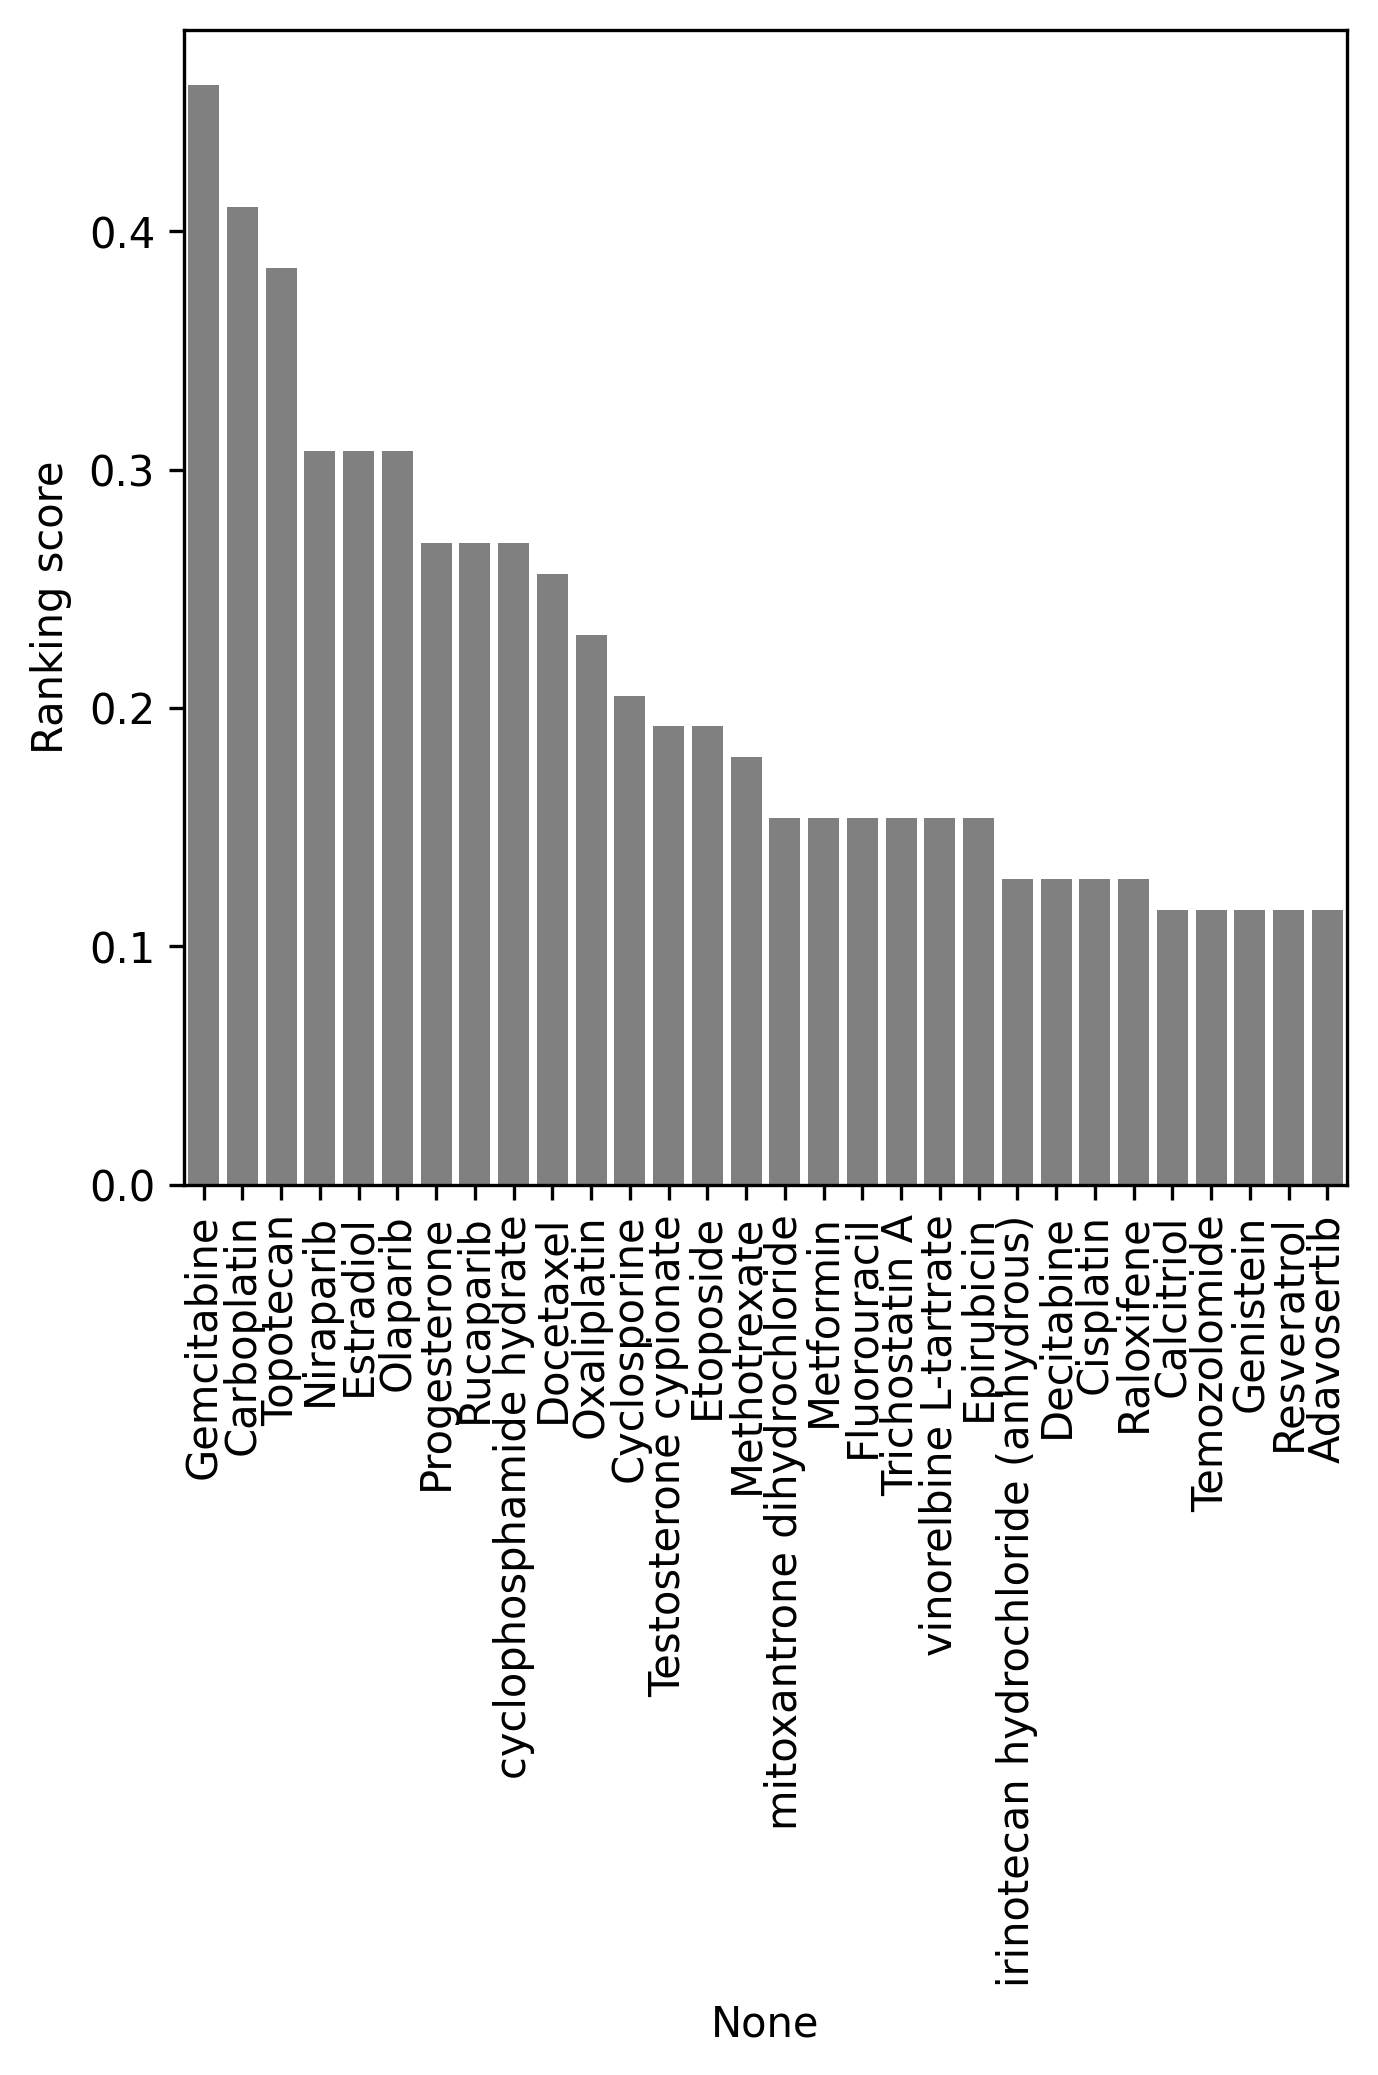

In [10]:
paths, input_node1_id, input_node2_id, result1, result2, result_parsed1, result_parsed2, result_ranked_by_primary_infores1, result_ranked_by_primary_infores2 = TCT.Path_finder('ovarian cancer', 
                                                                                                                                                                                'BRCA1', 
                                                                                                                                                                                ['biolink:Drug', 'biolink:SmallMolecule', 'biolink:ChemicalEntity'], 
                                                                                                                                                                                APInames=select_APIs, 
                                                                                                                                                                                metaKG=selected_metaKG, 
                                                                                                                                                                                API_predicates=API_predicates)

In [11]:
paths

score                output_node  \
Gemcitabine                0.461538               CHEBI:175901   
Carboplatin                0.410256                CHEBI:31355   
Topotecan                  0.384615                CHEBI:63632   
Niraparib                  0.307692               CHEBI:176844   
Estradiol                  0.307692                CHEBI:16469   
...                             ...                        ...   
Omega-3 fatty acids        0.012821  PUBCHEM.COMPOUND:56842239   
[OBSOLETE] sodium citrate  0.012821               MESH:C102006   
chenodiol                  0.012821                CHEBI:16755   
asbestos                   0.012821                CHEBI:46661   
NADPH                      0.012821                CHEBI:16474   

                                                                  predictes1  \
Gemcitabine                biolink:treats_or_applied_or_studied_to_treat;...   
Carboplatin                biolink:positively_correlated_with; biolink:re...   
Topotecan                  biolink:positively_correlated_with; biolink:re...   
Niraparib                  biolink:studied_to_treat; biolink:treats_or_ap...   
Estradiol                  biolink:positively_correlated_with; biolink:tr...   
...                                                                      ...   
Omega-3 fatty acids            biolink:treats_or_applied_or_studied_to_treat   
[OBSOLETE] sodium citrate         biolink:occurs_together_in_literature_with   
chenodiol                      biolink:treats_or_applied_or_studied_to_treat   
asbestos                          biolink:related_to; biolink:contributes_to   
NADPH                                                 biolink:contributes_to   

                                                                  predictes2  \
Gemcitabine                biolink:affects; biolink:affects; biolink:resi...   
Carboplatin                biolink:affects; biolink:interacts_with; bioli...   
Topotecan                  biolink:affects; biolink:regulates; biolink:re...   
Niraparib                  biolink:affects; biolink:affects; biolink:inte...   
Estradiol                  biolink:affects; biolink:affects; biolink:affe...   
...                                                                      ...   
Omega-3 fatty acids                                          biolink:affects   
[OBSOLETE] sodium citrate  biolink:occurs_together_in_literature_with; bi...   
chenodiol                  biolink:affects; biolink:affects; biolink:affects   
asbestos                   biolink:related_to; biolink:response_affected_...   
NADPH                      biolink:affects; biolink:affects; biolink:affects   

                                    output_node_name  
Gemcitabine                              Gemcitabine  
Carboplatin                              Carboplatin  
Topotecan                                  Topotecan  
Niraparib                                  Niraparib  
Estradiol                                  Estradiol  
...                                              ...  
Omega-3 fatty acids              Omega-3 fatty acids  
[OBSOLETE] sodium citrate  [OBSOLETE] sodium citrate  
chenodiol                                  chenodiol  
asbestos                                    asbestos  
NADPH                                          NADPH  

[478 rows x 5 columns]

In [12]:
forplot = TCT.visulize_path(input_node1_id, name_resolver.lookup('Olaparib').curie, input_node2_id, result1, result2) 

CytoscapeWidget(cytoscape_layout={'name': 'cola', 'title': 'Path', 'nodeSpacing': 80, 'edgeLengthVal': 50}, cy…

In [18]:

#TCT.visulization_one_hop_ranking(result_ranked_by_primary_infores1, result_parsed1, num_of_nodes = 30, input_query = input_node1_id, fontsize = 5)

In [17]:
#TCT.visulization_one_hop_ranking(result_ranked_by_primary_infores2, result_parsed2, num_of_nodes = 30, input_query = input_node2_id,fontsize = 5,title_fontsize=12)